# Main Modelling Notebook

David Modjeska and Andrew Greene

This notebook contains the actual models that we are using for this project.

In [1]:
# Begin with all the necessary imports

import itertools as it
import matplotlib
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import pandas as pd
import re
import scipy as sp
import sklearn.preprocessing as Preprocessing
import datetime

from itertools import combinations
from sklearn.cross_validation import KFold as kfold
from sklearn.decomposition import TruncatedSVD as tSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import LogisticRegression as Log_Reg
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from scipy.io import mmread

%matplotlib inline
plt.style.use('ggplot') 
from IPython.display import display, HTML

#### Load Data

The loading (which also handles filtering, standardizing, one-hot-encoding, etc.) occurs in a separate module for clarity's sake. Please see `Data_Loading.ipynb`, which is used to automatically generate `data_loading.py`

In [2]:
# load data
%run -i data_loading.py

248445
113036


C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Indexes computed

address_state object
annual_income float64
cpi float64
delinq_2_yrs int64
desc_len float64
dti float64
employ_length object
gdp float64
home_owner object
initial_list_status object
inquiry_6_mos int64
loan_amount int64
loan_purpose object
loan_term int64
months_since_last_record float64
open_accounts int64
revol_util float64
rir float64
total_accounts int64
unemploy float64
verif_status object
months_since_earliest_credit float64
emp_cleaned object
(Training set has 28182 rows)

address_state object
annual_income float64
cpi float64
delinq_2_yrs int64
desc_len float64
dti float64
employ_length object
gdp float64
home_owner object
initial_list_status object
inquiry_6_mos int64
loan_amount int64
loan_purpose object
loan_term int64
months_since_last_record float64
open_accounts int64
revol_util float64
rir float64
total_accounts int64
unemploy float64
verif_status object
months_since_earliest_credit float64
emp_cleaned object
(Test set has 84854 rows)
address_state objec

#### Set up Modelling Framework

Again, the framework is defined in an external module so it can be reused in various notebooks. Please see `Modelling_Framework.ipynb` from which `modelling_framework.py` is generated.

In [14]:
# set up modelling framework
% run -i modelling_framework.py

#### Sanity-checking the data

A reminder that initial data exploration occurs in the `amg_explore.ipynb` notebook. Here we are summarizing the properties of the data that have been loaded to establish benchmarks for our report.

In [4]:
# What is our sample size broken out by outcome?
y.value_counts()

True     23897
False     4285
Name: loan_status, dtype: int64

In [5]:
# As a result, what is our frequency of outcome?
y.mean()

0.84795259385423316

### Models without PCA

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


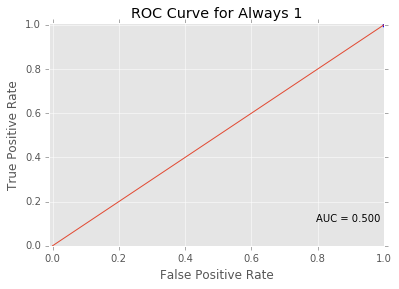

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.822  baseline: 0.822   prec: nan   f1: 0.902  | test score 0.824  prec nan


DummyClassifier(constant=1, random_state=None, strategy='constant')

In [6]:
# Simplest possible model: always assume the majority outcome. 
eval_model_by_year(lambda: DummyClassifier(strategy='constant', constant=1), model_name='Always 1')

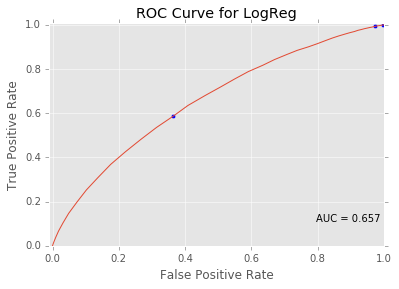

all   score: 0.848  baseline: 0.848   prec: 0.545   f1: 0.918  | test score 0.848  prec 0.577 f1 0.002  GP -912MM
2011  score: 0.894  baseline: 0.896   prec: nan   f1: 0.944  | test score 0.893  prec 0.714
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec 0.810
2013  score: 0.823  baseline: 0.822   prec: 0.429   f1: 0.902  | test score 0.823  prec 0.548


In [7]:
# Simplest approach is a naive Logistic Regression model
_ = eval_model_by_year(lambda: Log_Reg(), model_name='LogReg')

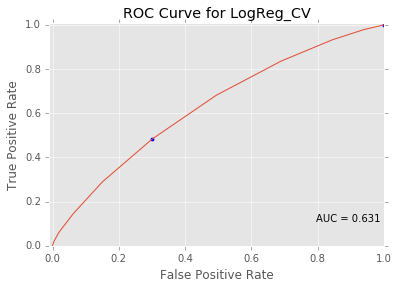

all   score: 0.848  baseline: 0.848   prec: 0.481   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.823  baseline: 0.822   prec: 0.372   f1: 0.902  | test score 0.823  prec 0.574
C= 0.0001


dti                                         -0.056828
revol_util                                  -0.055729
annual_income                                0.047810
inquiry_6_mos                               -0.045170
cpi                                         -0.041333
gdp                                         -0.039361
rir                                         -0.029219
total_accounts                               0.028072
home_owner__MORTGAGE                         0.024618
home_owner__RENT                            -0.022476
months_since_earliest_credit                 0.020826
delinq_2_yrs                                -0.016796
emp_cleaned__                               -0.013317
loan_purpose__credit_card                    0.012475
open_accounts                               -0.011064
desc_len                                     0.010758
employ_length__n/a                          -0.009026
employ_length__10                            0.008868
verif_status__Verified      

In [8]:
# But a more appropriate one uses cross-validation
logregcv_model = eval_model_by_year(lambda: Log_Reg_CV(), model_name='LogReg_CV')

# We want to know what value of C was selected by the cross-validation
print "C=", logregcv_model.C_[0]

# And we want to know which predictors are important; we do this by sorting them
# by the absolute value of their coefficients
lr_coeff = pd.DataFrame(logregcv_model.coef_.T, index=x_expanded.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()
lr_coeff.sort_values('abs', ascending=False).coeff

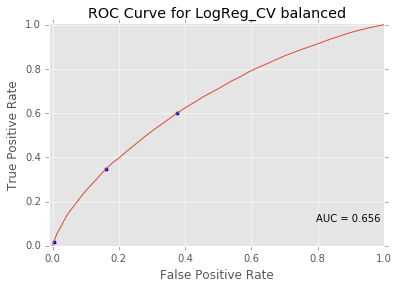

all   score: 0.607  baseline: 0.848   prec: 0.781   f1: 0.723  | test score 0.604  prec 0.782 f1 0.529  GP 2MM
2011  score: 0.630  baseline: 0.896   prec: 0.854   f1: 0.757  | test score 0.629  prec 0.847
2012  score: 0.597  baseline: 0.866   prec: 0.815   f1: 0.720  | test score 0.595  prec 0.822
2013  score: 0.623  baseline: 0.822   prec: 0.737   f1: 0.731  | test score 0.614  prec 0.748
C= 0.35938136638


cpi                                -1.270121
gdp                                 1.056242
emp_cleaned__policeofficer          0.868781
emp_cleaned__stateofcalifornia      0.730212
emp_cleaned__unitedairlines        -0.655025
emp_cleaned__americanairlines      -0.648836
loan_purpose__small_business       -0.625389
address_state__AK                   0.593871
emp_cleaned__sales                 -0.592327
emp_cleaned__                      -0.585427
emp_cleaned__unitedparcelservice   -0.583211
emp_cleaned__homedepot             -0.555485
emp_cleaned__salesmanager           0.548575
address_state__WY                   0.546345
annual_income                       0.534362
emp_cleaned__usgovernment          -0.531062
emp_cleaned__departmentofdefense    0.520970
loan_purpose__renewable_energy     -0.516902
home_owner__RENT                   -0.494092
loan_purpose__credit_card           0.485660
emp_cleaned__verizonwireless        0.450531
emp_cleaned__officemanager         -0.446235
emp_cleane

In [9]:
# But an even more appropriate one is (a) use cross-validation, and (b) use balanced weights
logregcv_model = eval_model_by_year(lambda: Log_Reg_CV(class_weight='balanced'), model_name='LogReg_CV balanced')

# We want to know what value of C was selected by the cross-validation
print "C=", logregcv_model.C_[0]

# And we want to know which predictors are important; we do this by sorting them
# by the absolute value of their coefficients
lr_coeff = pd.DataFrame(logregcv_model.coef_.T, index=x_expanded.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()
lr_coeff.sort_values('abs', ascending=False).coeff

This initial model already tells us some things: First, that the two most important predictors of a loan's likelihood of default are the Consumer Price Index, with a -1.3 coefficient, and the Gross Domestic Product, with a +1.1 coefficient. In other words, when inflation is low and economic strength is high, loans are more likely to be repaid; at a higher level, this shows that the state of the national economy is more important than the properties of any particular loan or borrower.

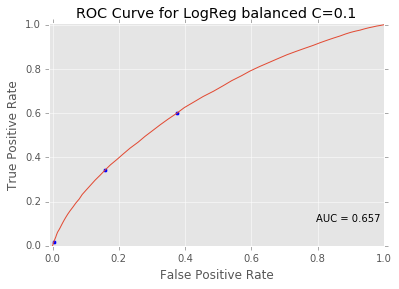

all   score: 0.608  baseline: 0.848   prec: 0.780   f1: 0.723  | test score 0.603  prec 0.782 f1 0.530  GP 5MM


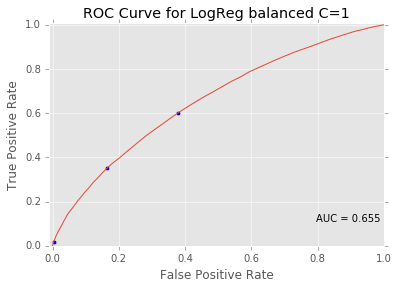

all   score: 0.607  baseline: 0.848   prec: 0.781   f1: 0.724  | test score 0.604  prec 0.782 f1 0.528  GP 0MM


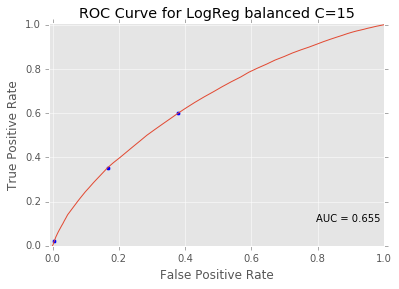

all   score: 0.607  baseline: 0.848   prec: 0.781   f1: 0.723  | test score 0.604  prec 0.783 f1 0.529  GP 1MM


In [10]:
for C in (0.1, 1, 15):
    eval_model_all_years(lambda: Log_Reg(class_weight='balanced', C=C), model_name='LogReg balanced C='+str(C))

Let's examine cross-terms

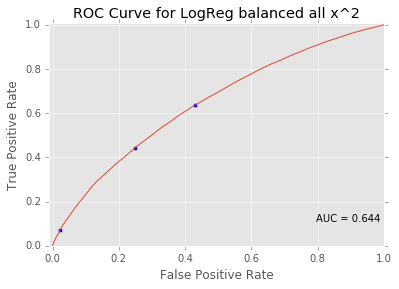

all   score: 0.632  baseline: 0.848   prec: 0.787   f1: 0.750  | test score 0.626  prec 0.781 f1 0.496  GP -90MM


In [11]:
lr_xterms = eval_model_all_years(lambda: Log_Reg_CV(class_weight='balanced'), 
                                 poly_degree = 2,
                                 # columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose', 'address_state'],
                                 model_name='LogReg balanced all x^2')

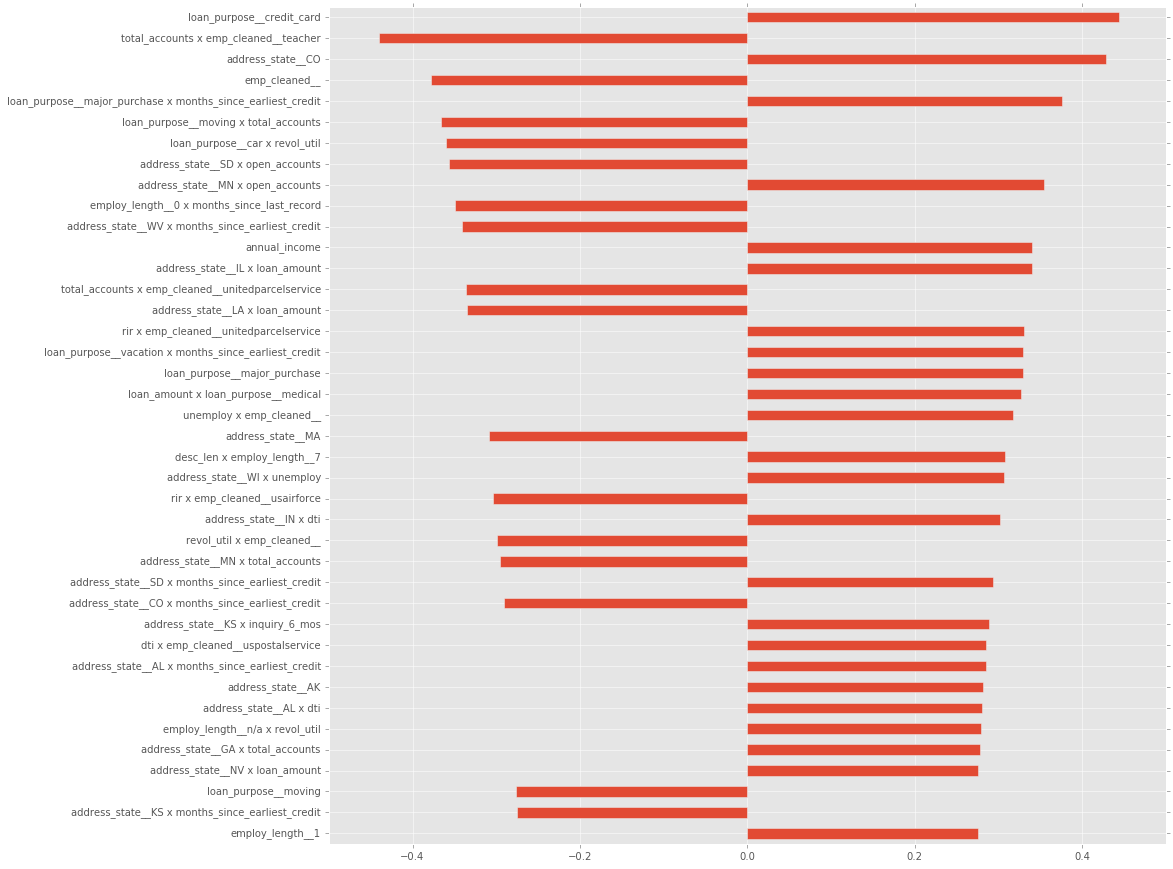

In [16]:
# And we want to know which predictors are important; we do this by sorting them
# by the absolute value of their coefficients
lr_coeff = pd.DataFrame(lr_xterms.coef_.T, index=cross_term_names(x_expanded, 2))
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()
plt.figure(figsize=(15,15))
lr_coeff.sort_values('abs', ascending=False).coeff[40:0:-1].plot(kind='barh')
plt.show()

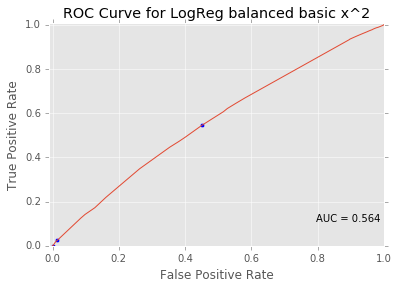

all   score: 0.545  baseline: 0.848   prec: 0.824   f1: 0.670  | test score 0.546  prec 0.822 f1 0.586  GP 45MM


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [17]:
eval_model_all_years(lambda: Log_Reg(class_weight='balanced'), 
                     poly_degree = 2,
                     columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose'],
                     model_name='LogReg balanced basic x^2')

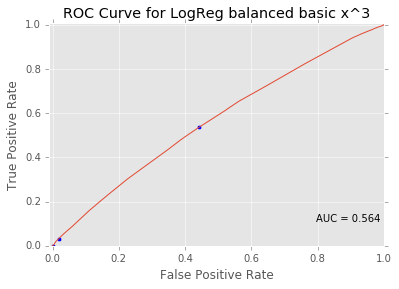

all   score: 0.535  baseline: 0.848   prec: 0.824   f1: 0.659  | test score 0.539  prec 0.823 f1 0.593  GP 31MM


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
eval_model_all_years(lambda: Log_Reg(class_weight='balanced'), 
                     poly_degree = 3,
                     columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose'],
                     model_name='LogReg balanced basic x^3')

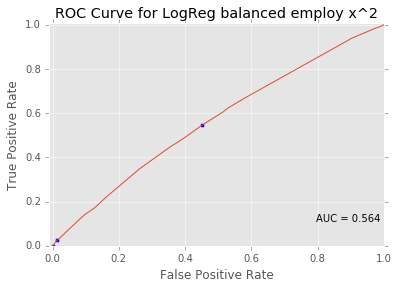

all   score: 0.545  baseline: 0.848   prec: 0.824   f1: 0.670  | test score 0.546  prec 0.822 f1 0.586  GP 45MM


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [19]:
eval_model_all_years(lambda: Log_Reg(class_weight='balanced'), 
                     poly_degree = 2,
                     columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose', 'employ_title'],
                     model_name='LogReg balanced employ x^2')

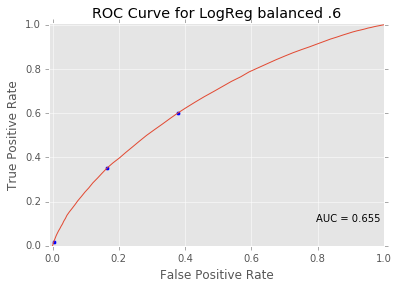

all   score: 0.607  baseline: 0.848   prec: 0.729   f1: 0.724  | test score 0.604  prec 0.736 f1 0.284  GP -489MM
2011  score: 0.633  baseline: 0.896   prec: 0.835   f1: 0.758  | test score 0.629  prec 0.818
2012  score: 0.598  baseline: 0.866   prec: 0.787   f1: 0.721  | test score 0.596  prec 0.805
2013  score: 0.619  baseline: 0.822   prec: 0.689   f1: 0.728  | test score 0.615  prec 0.706


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [20]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), prob_threshold=.6, model_name='LogReg balanced .6')

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\sklearn\discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


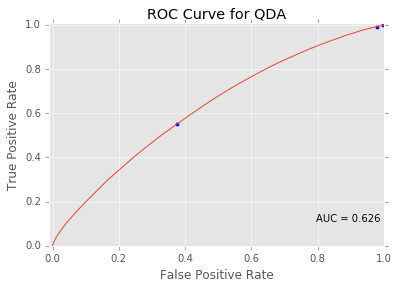

all   score: 0.847  baseline: 0.848   prec: 0.759   f1: 0.917  | test score 0.848  prec 0.744 f1 0.002  GP -913MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.821  baseline: 0.822   prec: 0.644   f1: 0.901  | test score 0.822  prec 0.705


QuadraticDiscriminantAnalysis(priors=None, reg_param=1,
               store_covariances=False, tol=0.0001)

In [21]:
eval_model_by_year(lambda: QDA(reg_param = 1), model_name='QDA')

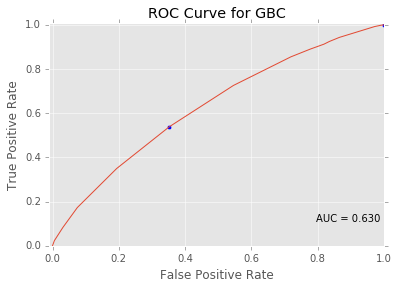

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.892  prec 0.833
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.822  baseline: 0.822   prec: nan   f1: 0.902  | test score 0.824  prec nan


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [22]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1), model_name='GBC')

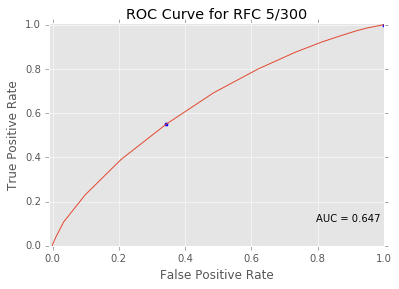

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.822  baseline: 0.822   prec: nan   f1: 0.902  | test score 0.824  prec nan


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1729, verbose=0,
            warm_start=False)

In [23]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300), model_name='RFC 5/300')

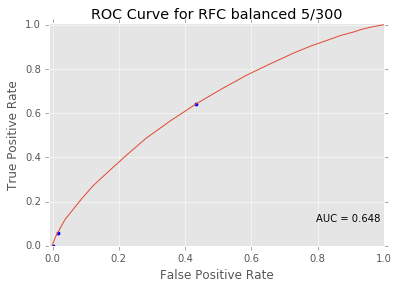

all   score: 0.638  baseline: 0.848   prec: 0.780   f1: 0.754  | test score 0.630  prec 0.780 f1 0.491  GP -153MM
2011  score: 0.750  baseline: 0.896   prec: 0.839   f1: 0.851  | test score 0.744  prec 0.828
2012  score: 0.637  baseline: 0.866   prec: 0.816   f1: 0.759  | test score 0.641  prec 0.818
2013  score: 0.649  baseline: 0.822   prec: 0.735   f1: 0.759  | test score 0.656  prec 0.736


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1729, verbose=0,
            warm_start=False)

In [24]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, class_weight = 'balanced', n_estimators=300),
                   model_name='RFC balanced 5/300')

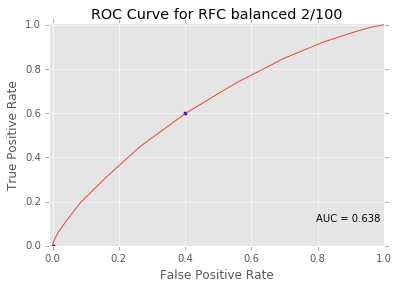

all   score: 0.594  baseline: 0.848   prec: 0.792   f1: 0.713  | test score 0.599  prec 0.789 f1 0.532  GP -67MM


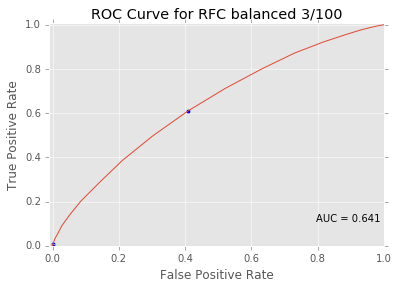

all   score: 0.605  baseline: 0.848   prec: 0.788   f1: 0.723  | test score 0.607  prec 0.787 f1 0.522  GP -72MM


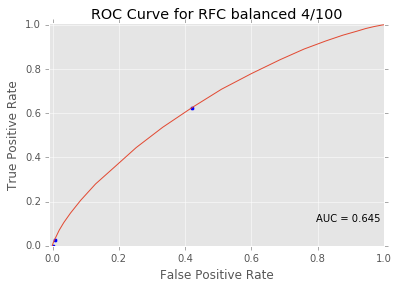

all   score: 0.622  baseline: 0.848   prec: 0.782   f1: 0.739  | test score 0.618  prec 0.783 f1 0.507  GP -106MM


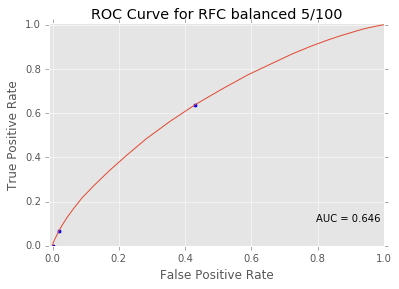

all   score: 0.632  baseline: 0.848   prec: 0.781   f1: 0.749  | test score 0.628  prec 0.780 f1 0.494  GP -150MM


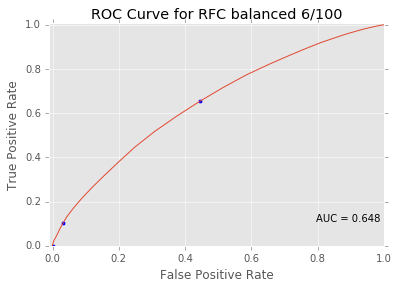

all   score: 0.642  baseline: 0.848   prec: 0.777   f1: 0.757  | test score 0.638  prec 0.777 f1 0.480  GP -177MM


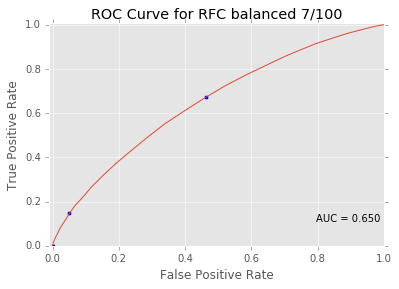

all   score: 0.659  baseline: 0.848   prec: 0.774   f1: 0.773  | test score 0.651  prec 0.773 f1 0.461  GP -215MM


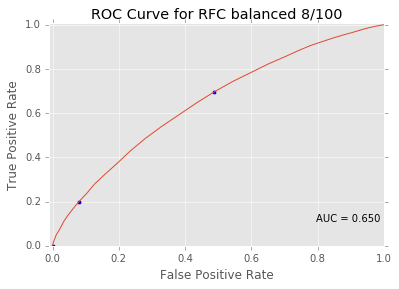

all   score: 0.675  baseline: 0.848   prec: 0.769   f1: 0.787  | test score 0.669  prec 0.768 f1 0.435  GP -265MM


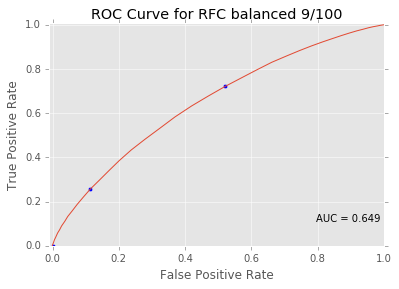

all   score: 0.695  baseline: 0.848   prec: 0.763   f1: 0.804  | test score 0.685  prec 0.765 f1 0.408  GP -321MM


In [25]:
for max_depth in range(2, 10):
    eval_model_all_years(lambda: RFC(random_state=1729, max_depth=max_depth, class_weight = 'balanced', n_estimators=100),
                         model_name='RFC balanced ' + str(max_depth) + '/100')  # TODO: other hyperparams

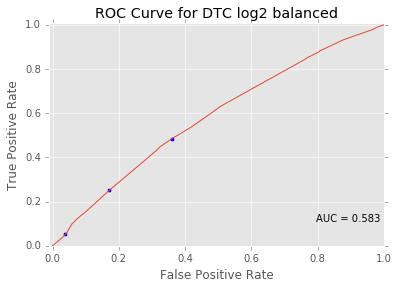

all   score: 0.554  baseline: 0.848   prec: 0.817   f1: 0.673  | test score 0.508  prec 0.818 f1 0.632  GP 220MM
2011  score: 0.446  baseline: 0.896   prec: 0.888   f1: 0.575  | test score 0.363  prec 0.884
2012  score: 0.563  baseline: 0.866   prec: 0.839   f1: 0.687  | test score 0.487  prec 0.851
2013  score: 0.555  baseline: 0.822   prec: 0.785   f1: 0.670  | test score 0.485  prec 0.801


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
eval_model_by_year(lambda: DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', criterion = 'gini'),
                  model_name='DTC log2 balanced')

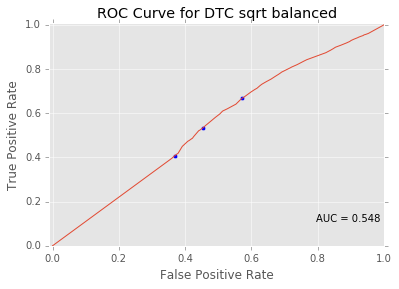

all   score: 0.634  baseline: 0.848   prec: 0.810   f1: 0.756  | test score 0.631  prec 0.813 f1 0.472  GP -228MM
2011  score: 0.722  baseline: 0.896   prec: 0.866   f1: 0.831  | test score 0.760  prec 0.872
2012  score: 0.610  baseline: 0.866   prec: 0.848   f1: 0.739  | test score 0.586  prec 0.857
2013  score: 0.630  baseline: 0.822   prec: 0.784   f1: 0.750  | test score 0.623  prec 0.793


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
eval_model_by_year(lambda: DTC(max_depth = 20, max_features = 'sqrt', class_weight = 'balanced', criterion = 'entropy'),
                  model_name='DTC sqrt balanced')

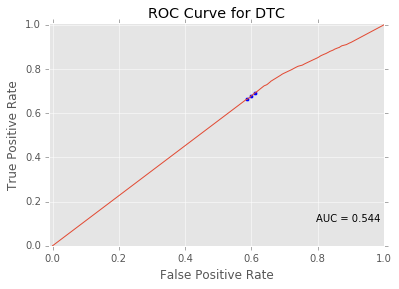

all   score: 0.674  baseline: 0.848   prec: 0.809   f1: 0.792  | test score 0.646  prec 0.816 f1 0.447  GP -267MM
2011  score: 0.805  baseline: 0.896   prec: 0.869   f1: 0.890  | test score 0.790  prec 0.857
2012  score: 0.699  baseline: 0.866   prec: 0.836   f1: 0.813  | test score 0.719  prec 0.845
2013  score: 0.673  baseline: 0.822   prec: 0.783   f1: 0.790  | test score 0.688  prec 0.784


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=20, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
eval_model_by_year(lambda: DTC(max_depth = 20, max_features = None, class_weight = 'balanced', criterion = 'entropy'),
                  model_name='DTC')

In [29]:
# This takes a very long time for practically no uplift
#eval_model_all_years(lambda: SVC(class_weight='balanced', probability=True))

In [30]:
# This takes a very long time for practically no uplift
#eval_model_all_years(lambda: SVC(class_weight='balanced', probability=True), prob_threshold=0.85)

#### Other Models without PCA

In [31]:
# TODO: Try again, this time fitting a regression against the payments received

In [32]:
# Curious -- what are the 95 CI for the baselines?
for yr in set(years.values):
    yr_n = (years == yr).sum()
    yr_def = (y[years == yr]).sum()
    yr_p = (y[years == yr]).mean()
    yr_se = (yr_p * (1.0-yr_p) / yr_n)
    print "y=%4d   n=%4d   d=%4d   p: %.3f | %.3f | %.3f" % (yr, yr_n, yr_def, yr_p - 1.96*yr_se, yr_p, yr_p + 1.96*yr_se)

y=2011   n=3561   d=3190   p: 0.896 | 0.896 | 0.896
y=2012   n=10764   d=9318   p: 0.866 | 0.866 | 0.866
y=2013   n=13857   d=11389   p: 0.822 | 0.822 | 0.822


In [33]:
# Default rate for small business is higher, right?
print y.mean()
print y[x_expanded.loan_purpose__small_business == 1].mean()

0.847952593854
0.761029411765


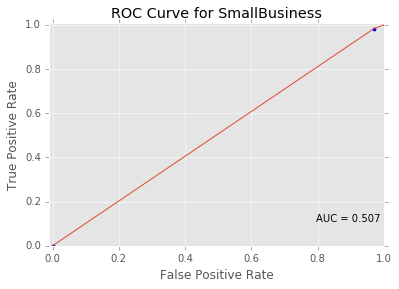

all   score: 0.838  baseline: 0.848   prec: 0.763   f1: 0.911  | test score 0.838  prec 0.761 f1 0.034  GP -869MM
2011  score: 0.872  baseline: 0.896   prec: 0.810   f1: 0.931  | test score 0.872  prec 0.797
2012  score: 0.853  baseline: 0.866   prec: 0.790   f1: 0.920  | test score 0.850  prec 0.794
2013  score: 0.817  baseline: 0.822   prec: 0.671   f1: 0.899  | test score 0.821  prec 0.662


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [34]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), ['loan_purpose__small_business'], model_name='SmallBusiness')

In [35]:
# LogReg is doing well.. what are the largest coefficients?
lr = Log_Reg(class_weight='balanced').fit(x_expanded[years.isin([2011,2012,2013])], y[years.isin([2011,2012,2013])])
lr_coeff = pd.DataFrame(lr.coef_.T, index=x_expanded.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()

In [36]:
lr_coeff.sort_values('abs', ascending=False).coeff

emp_cleaned__policeofficer          1.511396
cpi                                -1.422770
gdp                                 1.208699
emp_cleaned__stateofcalifornia      1.029268
home_owner__RENT                   -0.908285
emp_cleaned__americanairlines      -0.848502
emp_cleaned__unitedairlines        -0.815972
home_owner__OWN                    -0.809668
emp_cleaned__salesmanager           0.794174
emp_cleaned__departmentofdefense    0.747207
emp_cleaned__sales                 -0.705296
emp_cleaned__usgovernment          -0.704566
emp_cleaned__homedepot             -0.663418
address_state__AK                   0.662456
emp_cleaned__unitedparcelservice   -0.643569
address_state__WY                   0.638858
home_owner__MORTGAGE               -0.635898
loan_purpose__renewable_energy     -0.605290
loan_purpose__small_business       -0.599959
emp_cleaned__                      -0.595269
emp_cleaned__hewlettpackard         0.589129
emp_cleaned__verizonwireless        0.562246
emp_cleane

In [37]:
lr_probs = lr.predict_proba(x_expanded)[:,0]

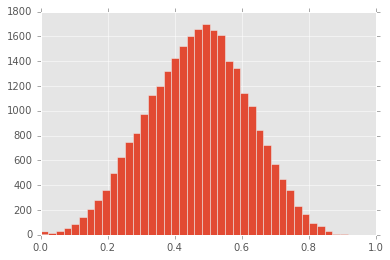

In [38]:
plt.hist(lr_probs ,bins=40)
plt.show()

In [39]:
1 - y.groupby([int(p*20)/20.0 for p in lr_probs]).mean()

0.00    0.043478
0.05    0.035088
0.10    0.040678
0.15    0.039877
0.20    0.047945
0.25    0.062793
0.30    0.072007
0.35    0.088639
0.40    0.112029
0.45    0.146514
0.50    0.170718
0.55    0.191562
0.60    0.242437
0.65    0.281824
0.70    0.311203
0.75    0.349794
0.80    0.480000
0.85    0.558824
0.90    0.000000
Name: loan_status, dtype: float64

In [40]:
# probs = eval_model_with_threshold(lambda: Log_Reg())

In [41]:
# probs = eval_model_with_threshold(lambda: Log_Reg(class_weight='balanced'))

In [42]:
# VERY SLOW
#probs = eval_model_with_threshold(lambda: SVC(
#        random_state=1729,
#        probability=True))

#### Models with PCA

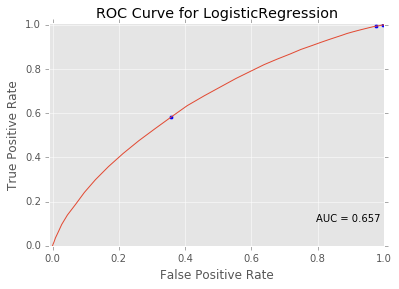

all   score: 0.848  baseline: 0.848   prec: 0.518   f1: 0.918  | test score 0.848  prec 0.553 f1 0.002  GP -913MM
2011  score: 0.893  baseline: 0.896   prec: nan   f1: 0.944  | test score 0.893  prec 0.714
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec 0.786
2013  score: 0.823  baseline: 0.822   prec: 0.436   f1: 0.902  | test score 0.823  prec 0.558


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
eval_model_by_year(lambda: Log_Reg(), x = x_expanded_pca, x_test = x_test_expanded_pca)

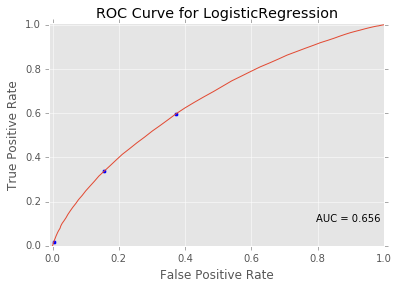

all   score: 0.605  baseline: 0.848   prec: 0.779   f1: 0.721  | test score 0.602  prec 0.782 f1 0.531  GP 8MM
2011  score: 0.627  baseline: 0.896   prec: 0.845   f1: 0.752  | test score 0.622  prec 0.847
2012  score: 0.594  baseline: 0.866   prec: 0.815   f1: 0.717  | test score 0.592  prec 0.822
2013  score: 0.619  baseline: 0.822   prec: 0.741   f1: 0.728  | test score 0.613  prec 0.749


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [44]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), x = x_expanded_pca, x_test = x_test_expanded_pca)

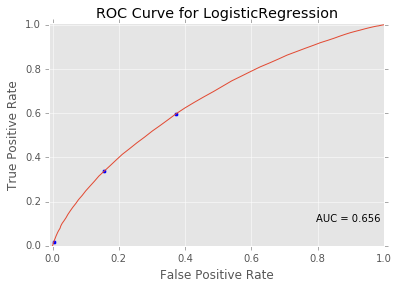

all   score: 0.605  baseline: 0.848   prec: 0.725   f1: 0.721  | test score 0.602  prec 0.736 f1 0.279  GP -498MM
2011  score: 0.627  baseline: 0.896   prec: 0.830   f1: 0.752  | test score 0.622  prec 0.815
2012  score: 0.594  baseline: 0.866   prec: 0.778   f1: 0.717  | test score 0.592  prec 0.800
2013  score: 0.619  baseline: 0.822   prec: 0.687   f1: 0.728  | test score 0.613  prec 0.703


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [45]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), prob_threshold=.6, 
                   x = x_expanded_pca, x_test = x_test_expanded_pca)

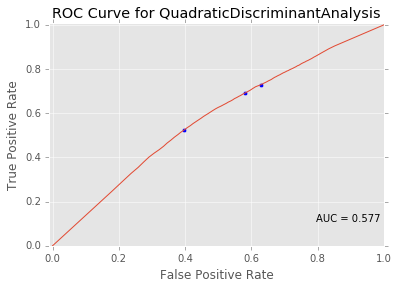

all   score: 0.680  baseline: 0.848   prec: 0.796   f1: 0.795  | test score 0.675  prec 0.803 f1 0.405  GP -331MM
2011  score: 0.602  baseline: 0.896   prec: 0.872   f1: 0.730  | test score 0.628  prec 0.872
2012  score: 0.672  baseline: 0.866   prec: 0.837   f1: 0.792  | test score 0.692  prec 0.842
2013  score: 0.675  baseline: 0.822   prec: 0.765   f1: 0.789  | test score 0.684  prec 0.773


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [46]:
eval_model_by_year(lambda: QDA(), x = x_expanded_pca, x_test = x_test_expanded_pca)

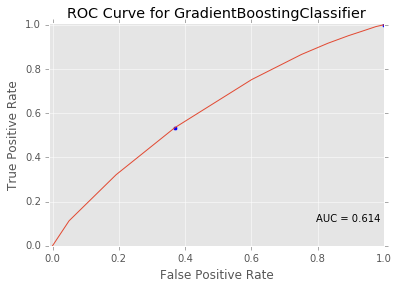

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.822  baseline: 0.822   prec: nan   f1: 0.902  | test score 0.824  prec nan


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [47]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                  x = x_expanded_pca, x_test = x_test_expanded_pca)

## NLP Modeling

#### Top Terms in Each Class

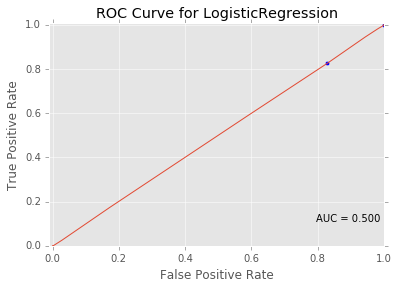

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM
2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
eval_model_by_year(lambda: Log_Reg(), x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

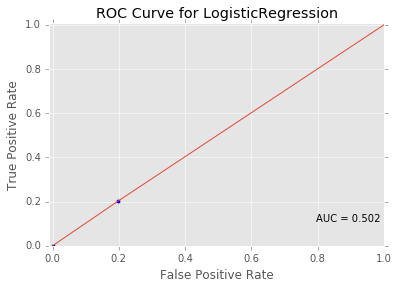

all   score: 0.296  baseline: 0.860   prec: 0.858   f1: 0.338  | test score 0.284  prec 0.862 f1 0.829  GP 198MM
2011  score: 0.628  baseline: 0.904   prec: 0.910   f1: 0.757  | test score 0.557  prec 0.875
2012  score: 0.294  baseline: 0.866   prec: 0.865   f1: 0.334  | test score 0.186  prec 0.868
2013  score: 0.511  baseline: 0.830   prec: 0.830   f1: 0.629  | test score 0.545  prec 0.838


LogisticRegression(C=1e-06, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [49]:
eval_model_by_year(lambda: Log_Reg(C = 10 ** -6, class_weight = 'balanced'), 
                   x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

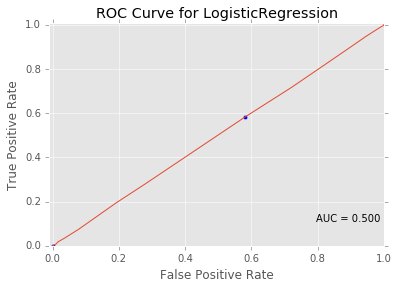

all   score: 0.565  baseline: 0.860   prec: 0.914   f1: 0.699  | test score 0.561  prec 0.826 f1 0.002  GP -230MM
2011  score: 0.478  baseline: 0.904   prec: 0.884   f1: 0.620  | test score 0.517  prec 0.921
2012  score: 0.578  baseline: 0.866   prec: 0.820   f1: 0.712  | test score 0.551  prec 0.914
2013  score: 0.527  baseline: 0.830   prec: 0.866   f1: 0.654  | test score 0.524  prec 0.759


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [50]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), prob_threshold = 0.6,
                   x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

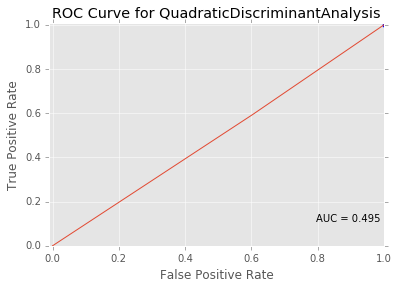

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM
2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


QuadraticDiscriminantAnalysis(priors=None, reg_param=1,
               store_covariances=False, tol=0.0001)

In [51]:
eval_model_by_year(lambda: QDA(reg_param = 1), x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

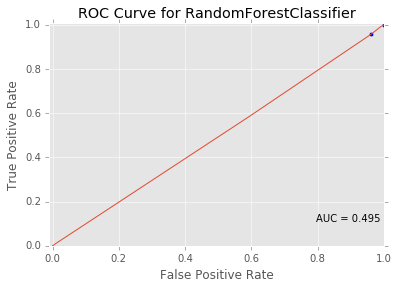

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM
2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1729, verbose=0,
            warm_start=False)

In [52]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

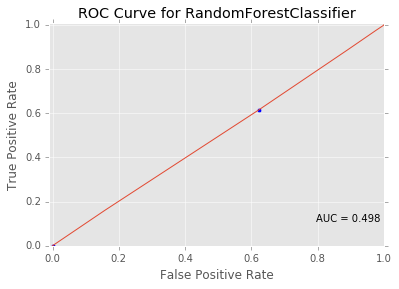

all   score: 0.582  baseline: 0.860   prec: 0.860   f1: 0.716  | test score 0.582  prec 0.865 f1 0.533  GP -24MM
2011  score: 0.555  baseline: 0.904   prec: 0.903   f1: 0.696  | test score 0.597  prec 0.885
2012  score: 0.632  baseline: 0.866   prec: 0.864   f1: 0.761  | test score 0.602  prec 0.872
2013  score: 0.534  baseline: 0.830   prec: 0.830   f1: 0.661  | test score 0.558  prec 0.838


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1729, verbose=0,
            warm_start=False)

In [53]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300, class_weight = 'balanced'),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

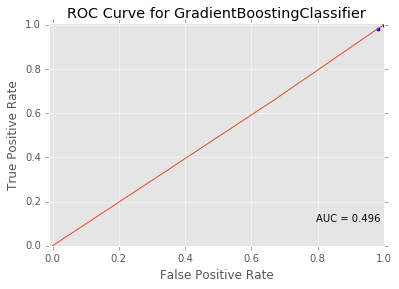

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM
2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [54]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

#### Full Document-Term Matrix (Reduced with PCA)

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\pandas\core\internals.py:227: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 84854 but corresponding boolean dimension is 21485
  return self.values[slicer]
C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 84854 but corresponding boolean dimension is 21485
  result = getitem(key)


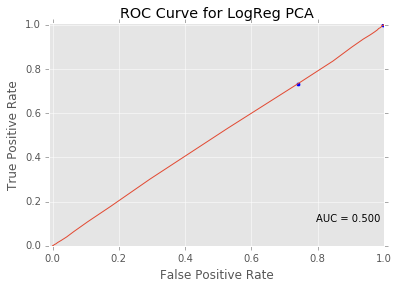

all   score: 0.860  baseline: 0.860   prec: 0.793   f1: 0.924  | test score 0.862  prec 0.857 f1 0.001  GP -236MM
2011  score: 0.900  baseline: 0.904   prec: 0.921   f1: 0.947  | test score 0.891  prec 0.875
2012  score: 0.864  baseline: 0.866   prec: 0.749   f1: 0.927  | test score 0.864  prec 0.824
2013  score: 0.830  baseline: 0.830   prec: 0.960   f1: 0.907  | test score 0.836  prec 0.750


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
eval_model_by_year(lambda: Log_Reg(), x = desc_matrix_pca, x_test = desc_matrix_test_pca, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='LogReg PCA')

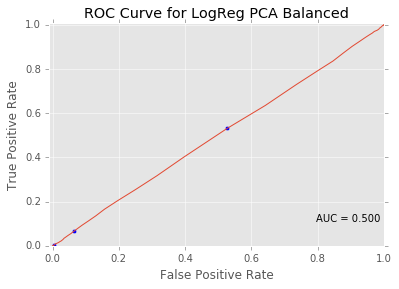

all   score: 0.524  baseline: 0.860   prec: 0.858   f1: 0.658  | test score 0.524  prec 0.861 f1 0.607  GP 20MM
2011  score: 0.590  baseline: 0.904   prec: 0.905   f1: 0.729  | test score 0.593  prec 0.910
2012  score: 0.522  baseline: 0.866   prec: 0.870   f1: 0.658  | test score 0.533  prec 0.864
2013  score: 0.530  baseline: 0.830   prec: 0.833   f1: 0.659  | test score 0.530  prec 0.840


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [56]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), x = desc_matrix_pca, x_test = desc_matrix_test_pca, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='LogReg PCA Balanced')

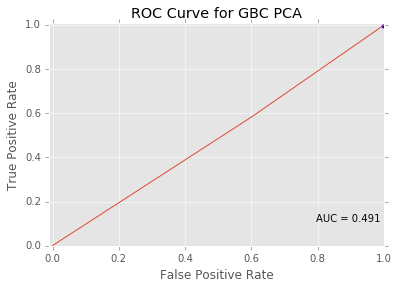

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -237MM
2011  score: 0.903  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [57]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                   x = desc_matrix_pca, x_test = desc_matrix_test_pca,
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='GBC PCA')

## Stacking

In [58]:
class Stacking(object):
    
    def __init__(self, unfitted_combiner, component_type = 'mixed'):
        self.combiner = unfitted_combiner
        self.model_stack = None   
        
        stack = []
        
        # logistic regression component models with various class weights
        if component_type == 'log_reg':
            for diff in np.arange(0, 5, 0.5):
                weight_dict = { 0 : 1, 1 : (1 + diff) }
                stack.append([Log_Reg(C = 1, class_weight = weight_dict), 'Log_Reg ' + str(1 + diff)])
                
        # default - mixed component models
        else:
            stack.append((Log_Reg(C = 10 ** -5), 'Log_Reg'))
            stack.append((Log_Reg(C = 10 ** -5, class_weight = 'balanced'), 'Log_Reg balanced'))
            stack.append((LDA(shrinkage = 1, solver = 'eigen'), 'LDA'))
            stack.append((QDA(reg_param = 1), 'QDA'))
            stack.append((RFC(random_state=1729, n_estimators = 10, max_depth = 4), 'RF'))
            stack.append((RFC(random_state=1729, n_estimators = 300, max_depth = 5, class_weight = 'balanced'),
                        'RF balanced'))
            stack.append((GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1), 'Boost'))
            stack.append((DTC(max_depth = 10, max_features = 'log2', criterion = 'gini'), 'Tree 1'))
            stack.append((DTC(max_depth = 20, max_features = 'sqrt', criterion = 'entropy'), 'Tree 2'))
            stack.append((DTC(max_depth = 20, max_features = None, criterion = 'entropy'), 'Tree 3'))
            stack.append((DTC(max_depth = 30, max_features = None, criterion = 'gini'), 'Tree 4'))      
            #stack.append(SVC(class_weight = 'balanced')) # slow
                         
        self.model_stack = pd.DataFrame(stack, columns = ['Model_Params', 'Model'])
        self.num_models = len(self.model_stack)
    
    def _predict_component_models(self, X):
        n = X.shape[0]
        y_hat_stack = np.zeros((n, self.num_models))
        for index in range(self.num_models):
            y_hat_stack[:, index] = self.model_stack.iloc[index, 0].predict(X)
        return y_hat_stack
        
    def fit(self, X, y):
        for index in range(self.num_models):
            self.model_stack.iloc[index, 0].fit(X, y)
        y_hat_stack = self._predict_component_models(X)
        self.combiner = self.combiner.fit(y_hat_stack, y)
        return self
        
    def score(self, X, y):
        y_hat_stack = self._predict_component_models(X)
        score = self.combiner.score(y_hat_stack, y)
        return score
              
    def predict(self, X):
        y_hat_stack = self._predict_component_models(X)
        y_hat = self.combiner.predict(y_hat_stack)
        return y_hat
    
    def predict_proba(self, X):
        y_hat_stack = self._predict_component_models(X)
        y_hat_proba = self.combiner.predict_proba(y_hat_stack)
        return y_hat_proba
    
    def confusion_matrix(self, y, y_hat):
        return confusion_matrix(y, y_hat)
     
    def f1_score(self, y, y_hat):
        return f1_score(y, y_hat, pos_label = 1)
    
    def get_features(self):
        long_name = str(type(self.combiner))
        short_name = re.sub('.*\.', '', long_name)
        short_name = re.sub('\'>', '', short_name)
        
        index = index = self.model_stack.iloc[:, 1]
        if short_name == 'LogisticRegression':
            return pd.DataFrame(self.combiner.coef_.T, index = index)
        else:
            return pd.DataFrame(self.combiner.feature_importances_.T, index = index)

In [59]:
def print_stacking_features(x_train, y_train, x_test, y_test, combiner, component_type = 'mixed'):
    model = Stacking(combiner, component_type)
    model.fit(x_train, y_train)
    
    features = model.get_features()
    features.columns = ['Importance']
    features['Abs'] = np.abs(features.Importance)
    features = features.sort_values('Abs', ascending = False).drop('Abs', axis = 1)
    display(features)

#### Regular Data

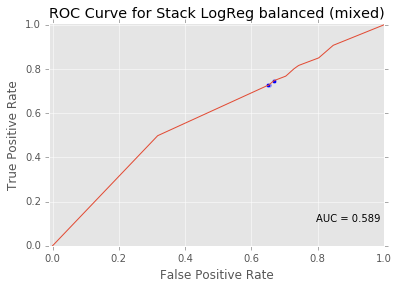

all   score: 0.694  baseline: 0.848   prec: 0.802   f1: 0.808  | test score 0.685  prec 0.810 f1 0.384  GP -356MM
2011  score: 0.799  baseline: 0.896   prec: 0.865   f1: 0.886  | test score 0.786  prec 0.858
2012  score: 0.736  baseline: 0.866   prec: 0.822   f1: 0.841  | test score 0.702  prec 0.839
2013  score: 0.683  baseline: 0.822   prec: 0.793   f1: 0.799  | test score 0.716  prec 0.778


In [60]:
combiner = Log_Reg(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
eval_model_by_year(lambda: Stacking(combiner), model_name = "Stack LogReg balanced (mixed)")

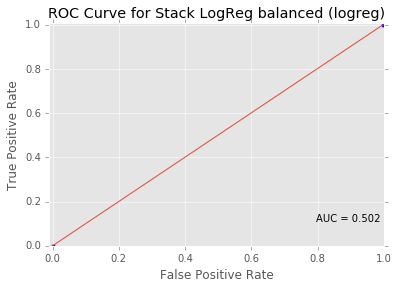

all   score: 0.848  baseline: 0.848   prec: 0.545   f1: 0.918  | test score 0.848  prec 0.577 f1 0.002  GP -912MM
2011  score: 0.894  baseline: 0.896   prec: nan   f1: 0.944  | test score 0.893  prec 0.714
2012  score: 0.866  baseline: 0.866   prec: 0.333   f1: 0.928  | test score 0.865  prec 0.800
2013  score: 0.823  baseline: 0.822   prec: 0.452   f1: 0.902  | test score 0.823  prec 0.564


In [61]:
combiner = Log_Reg(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
eval_model_by_year(lambda: Stacking(combiner, 'log_reg'), model_name = "Stack LogReg balanced (logreg)")

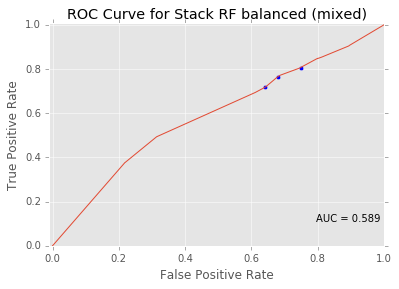

all   score: 0.693  baseline: 0.848   prec: 0.804   f1: 0.807  | test score 0.723  prec 0.811 f1 0.312  GP -500MM
2011  score: 0.787  baseline: 0.896   prec: 0.881   f1: 0.878  | test score 0.773  prec 0.852
2012  score: 0.716  baseline: 0.866   prec: 0.848   f1: 0.827  | test score 0.711  prec 0.839
2013  score: 0.676  baseline: 0.822   prec: 0.793   f1: 0.794  | test score 0.690  prec 0.793


In [62]:
combiner = RFC(random_state=1729, n_estimators = 10, max_depth = 4, max_features = 'sqrt', 
               criterion = 'gini', class_weight = 'balanced')
eval_model_by_year(lambda: Stacking(combiner), model_name = "Stack RF balanced (mixed)")

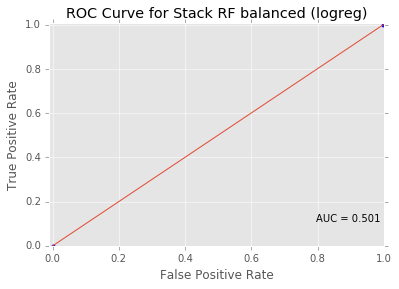

all   score: 0.706  baseline: 0.848   prec: 0.576   f1: 0.733  | test score 0.848  prec 0.589 f1 0.002  GP -913MM
2011  score: 0.585  baseline: 0.896   prec: nan   f1: 0.569  | test score 0.893  prec 0.714
2012  score: 0.578  baseline: 0.866   prec: nan   f1: 0.558  | test score 0.135  prec 0.865
2013  score: 0.822  baseline: 0.822   prec: 0.475   f1: 0.902  | test score 0.823  prec 0.566


In [63]:
combiner = RFC(random_state=1729, n_estimators = 10, max_depth = 4, max_features = 'sqrt', 
               criterion = 'gini', class_weight = 'balanced')
eval_model_by_year(lambda: Stacking(combiner, 'log_reg'), model_name = "Stack RF balanced (logreg)")

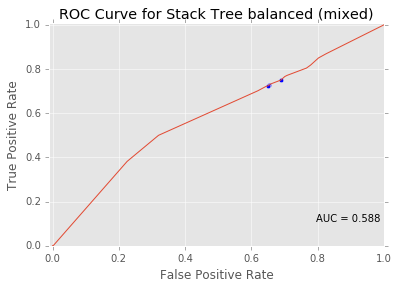

all   score: 0.683  baseline: 0.848   prec: 0.805   f1: 0.799  | test score 0.683  prec 0.818 f1 0.383  GP -363MM
2011  score: 0.789  baseline: 0.896   prec: 0.861   f1: 0.879  | test score 0.780  prec 0.860
2012  score: 0.727  baseline: 0.866   prec: 0.825   f1: 0.835  | test score 0.698  prec 0.838
2013  score: 0.676  baseline: 0.822   prec: 0.798   f1: 0.794  | test score 0.691  prec 0.791


In [64]:
combiner = DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini')
eval_model_by_year(lambda: Stacking(combiner), model_name = "Stack Tree balanced (mixed)")

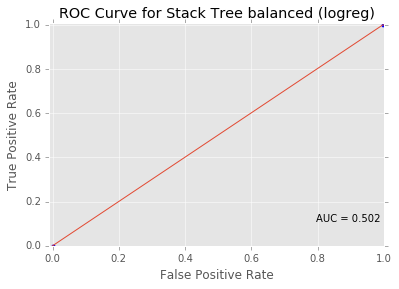

all   score: 0.848  baseline: 0.848   prec: 0.559   f1: 0.918  | test score 0.848  prec 0.577 f1 0.002  GP -912MM
2011  score: 0.894  baseline: 0.896   prec: nan   f1: 0.944  | test score 0.893  prec 0.714
2012  score: 0.866  baseline: 0.866   prec: 0.333   f1: 0.928  | test score 0.865  prec 0.800
2013  score: 0.823  baseline: 0.822   prec: 0.450   f1: 0.902  | test score 0.823  prec 0.564


In [65]:
combiner = DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini')
eval_model_by_year(lambda: Stacking(combiner, 'log_reg'), model_name = "Stack Tree balanced (logreg)")

#### Stacking Feature Importances

In [66]:
combiner = Log_Reg(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
print_stacking_features(x_expanded, y, x_test_expanded, y_test, combiner, 'mixed')

,Importance
Model,
Tree 4,7.961409
Tree 3,5.541294
Tree 2,3.414525
Log_Reg,-2.361258
RF,-2.361258
Boost,-2.361258
LDA,-2.299470
QDA,-2.299470
Tree 1,0.503947


In [67]:
combiner = RFC(random_state=1729, n_estimators = 10, max_depth = 4, max_features = 'sqrt', 
               criterion = 'gini', class_weight = 'balanced')
print_stacking_features(x_expanded, y, x_test_expanded, y_test, combiner, 'mixed')

,Importance
Model,
Tree 4,5.947177e-01
Tree 3,2.653386e-01
Tree 2,1.140718e-01
RF balanced,1.263378e-02
Log_Reg balanced,9.798517e-03
Tree 1,3.398499e-03
QDA,4.017919e-05
LDA,9.527882e-07
Log_Reg,0.000000e+00


In [68]:
combiner = DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini')
print_stacking_features(x_expanded, y, x_test_expanded, y_test, combiner, 'mixed')

,Importance
Model,
Tree 4,0.409891
Tree 2,0.274639
Tree 3,0.267515
RF balanced,0.045518
Tree 1,0.002207
Log_Reg balanced,0.000094
QDA,0.000070
LDA,0.000066
Log_Reg,0.000000


## Visualizations

In [69]:
pd.DataFrame(model_performance).T.sort_values('test_prec', ascending=False)

,auc,baseline,f1,prec,score,test_f1,test_prec,test_profit,test_score
RandomForestClassifier,0.497518,0.860074,0.716248,0.859688,0.582459,0.533418,0.864835,-24.230891,0.581941
LogReg PCA Balanced,0.500083,0.860074,0.657955,0.858047,0.524233,0.606677,0.861497,20.412340,0.523668
LogReg PCA,0.500229,0.860074,0.924484,0.793333,0.859595,0.001294,0.857143,-236.575713,0.862136
LogisticRegression,0.499836,0.860074,0.698902,0.914265,0.564614,0.002048,0.826087,-230.231080,0.560531
LogReg balanced basic x^3,0.564158,0.847953,0.659433,0.823989,0.535093,0.593443,0.822941,31.757548,0.539385
LogReg balanced basic x^2,0.563749,0.847953,0.670414,0.823727,0.545276,0.585755,0.822404,45.756872,0.545796
LogReg balanced employ x^2,0.563749,0.847953,0.670414,0.823727,0.545276,0.585755,0.822404,45.756872,0.545796
DTC log2 balanced,0.582779,0.847953,0.672614,0.817077,0.553760,0.632295,0.818314,220.314522,0.508332
Stack Tree balanced (mixed),0.588177,0.847953,0.798964,0.804515,0.683025,0.383033,0.818004,-363.469150,0.683409
DTC,0.543669,0.847953,0.791997,0.809156,0.674297,0.447295,0.815801,-267.741252,0.645980


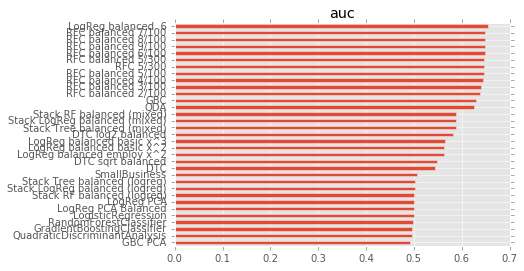

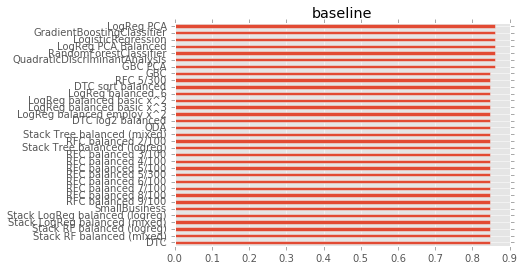

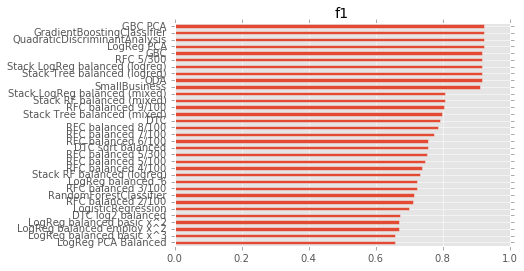

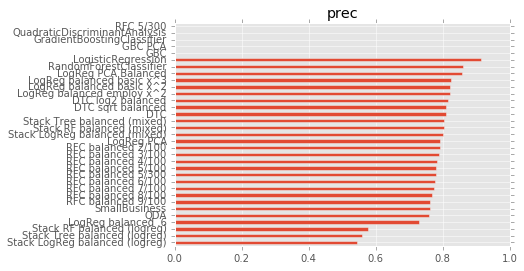

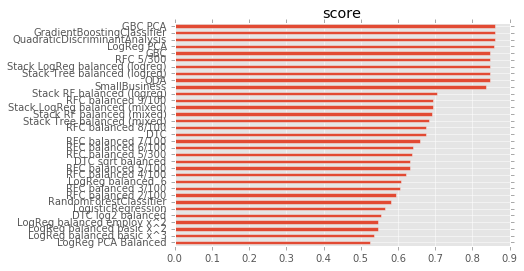

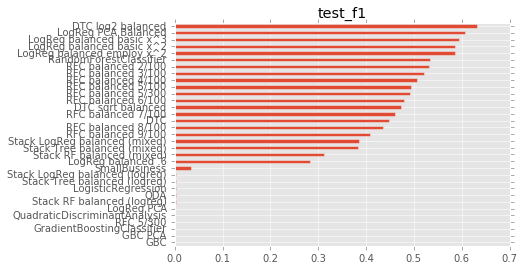

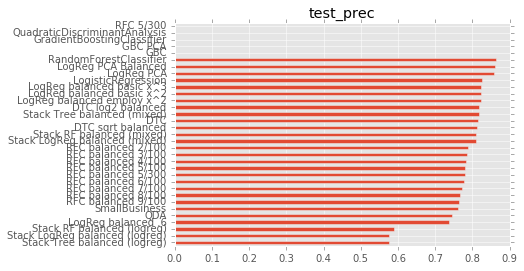

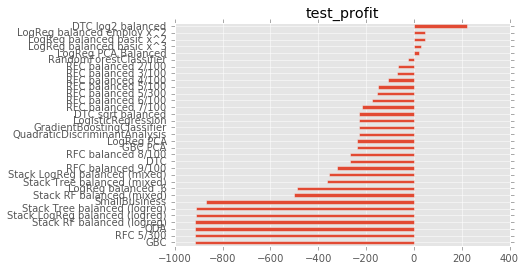

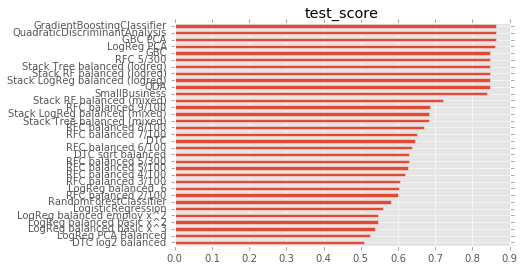

In [70]:
model_performance_df = pd.DataFrame(model_performance).T
for col in model_performance_df.columns:
    model_performance_df[col].sort_values().plot(kind='barh')
    plt.title(col)
    plt.show()

### Profit

In [71]:
# calculate profits
revenues = profit_data_train.total_rec_int + profit_data_train.total_rec_prncp + \
        profit_data_train.total_rec_late_fee + profit_data_train.recoveries
costs = profit_data_train.loan_amount
profit_data_train.actual_profit = revenues - costs

(array([  4.00000000e+00,   4.00000000e+01,   5.70000000e+01,
          7.30000000e+01,   9.80000000e+01,   9.70000000e+01,
          1.18000000e+02,   1.18000000e+02,   1.26000000e+02,
          1.52000000e+02,   1.69000000e+02,   1.72000000e+02,
          1.64000000e+02,   1.81000000e+02,   1.72000000e+02,
          1.74000000e+02,   1.41000000e+02,   1.63000000e+02,
          2.22000000e+02,   1.78000000e+02,   1.69000000e+02,
          1.90000000e+02,   1.83000000e+02,   1.61000000e+02,
          1.50000000e+02,   1.32000000e+02,   1.07000000e+02,
          9.10000000e+01,   7.70000000e+01,   9.50000000e+01,
          6.30000000e+01,   6.50000000e+01,   6.20000000e+01,
          2.80000000e+01,   3.70000000e+01,   1.70000000e+01,
          2.00000000e+01,   1.10000000e+01,   2.39040000e+04,
          1.00000000e+00]),
 array([ 0.        ,  0.02612489,  0.05224978,  0.07837468,  0.10449957,
         0.13062446,  0.15674935,  0.18287425,  0.20899914,  0.23512403,
         0.26124892,

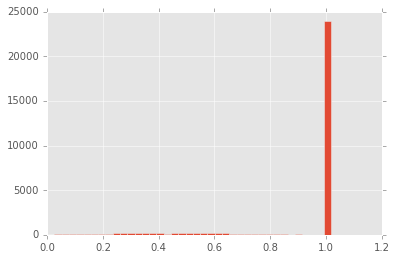

In [72]:
profit_ratio = np.where(y, 1.0, revenues / (profit_data_train.installment * 36))
plt.hist(profit_ratio, bins=40)

In [73]:
from sklearn.linear_model import RidgeCV
np.random.seed(1729)
train_flags_ridge = np.random.random(len(x_expanded)) < 0.7

ridge_profit = RidgeCV().fit(x_expanded.iloc[train_flags_ridge, :], profit_ratio[train_flags_ridge])
print "Alpha:", ridge_profit.alpha_
print "Train R^2:", ridge_profit.score(x_expanded.iloc[train_flags_ridge, :], profit_ratio[train_flags_ridge])
print "Test R^2:", ridge_profit.score(x_expanded.iloc[~train_flags_ridge, :], profit_ratio[~train_flags_ridge])

Alpha: 10.0
Train R^2: 0.050337120299
Test R^2: 0.0368817942835


In [74]:
# print summary revenue and cost
print "REVENUES"
print "Total interested received =", profit_data.total_rec_int.sum() / float(10 ** 6)
print "Total principal received =", profit_data.total_rec_prncp.sum() / float(10 ** 6)
print "Total late fees received =", profit_data.total_rec_late_fee.sum() / float(10 ** 6)
print "Recoveries =", profit_data.recoveries.sum() / float(10 ** 6)
print
print "COSTS"
print "Total loan amounts =", profit_data.loan_amount.sum() / float(10 ** 6)

REVENUES
Total interested received = 204.88315865
Total principal received = 1216.20363347
Total late fees received = 0.0743948083222
Recoveries = 11.84101203

COSTS
Total loan amounts = 1342.7455


In [75]:
### fit and score for profits

predictors = x_expanded_pca
response = profit_data_train.actual_profit > 0

np.random.seed(1729)
train_flags = np.random.random(predictors.shape[0]) < 0.7
local_x_train = predictors.iloc[train_flags, :]
local_y_train = response[train_flags]
local_x_test = predictors.iloc[~train_flags, :]
local_y_test = response[~train_flags]

model = Lin_Reg().fit(local_x_train, local_y_train)
local_test_score = model.score(local_x_test, local_y_test)
print "R-squared on local test set =", local_test_score

R-squared on local test set = 0.0339718866674


In [76]:
### fit and score for classification

predictors = x_expanded_pca
response = profit_data_train.actual_profit > 0

np.random.seed(1729)
train_flags = np.random.random(predictors.shape[0]) < 0.7
local_x_train = predictors.iloc[train_flags, :]
local_y_train = response[train_flags]
local_x_test = predictors.iloc[~train_flags, :]
local_y_test = response[~train_flags]

model = Log_Reg(class_weight = 'balanced').fit(local_x_train, local_y_train)
local_test_score = model.score(local_x_test, local_y_test)
print "Accuracy on local test set =", local_test_score
local_test_y_hat = model.predict(local_x_test)
local_test_precision = local_y_test[local_test_y_hat].mean()
print "Precision on local test set =", local_test_precision

Accuracy on local test set = 0.618227484751
Precision on local test set = 0.911298621115


In [77]:
### fit and predict for classification

model2 = Log_Reg(class_weight = 'balanced').fit(x_expanded_pca, y)
y_predict_train = pd.DataFrame(model2.predict(x_expanded_pca))
y_predict_test = pd.DataFrame(model2.predict(x_test_expanded_pca))

y_predict_train.index = x_expanded_pca.index
y_predict_test.index = x_test_expanded_pca.index

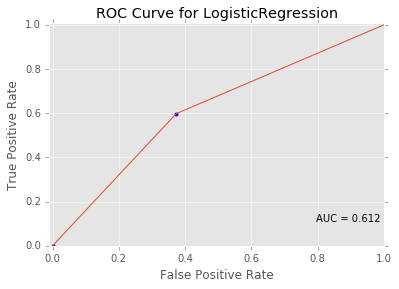

all   score: 0.611  baseline: 0.848   prec: 0.774   f1: 0.725  | test score 0.602  prec 0.782 f1 0.531  GP 8MM
2011  score: 0.787  baseline: 0.896   prec: 0.795   f1: 0.875  | test score 0.772  prec 0.804
2012  score: 0.644  baseline: 0.866   prec: 0.803   f1: 0.763  | test score 0.643  prec 0.808
2013  score: 0.539  baseline: 0.822   prec: 0.757   f1: 0.638  | test score 0.528  prec 0.767


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [78]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), x = y_predict_train, x_test = y_predict_test)

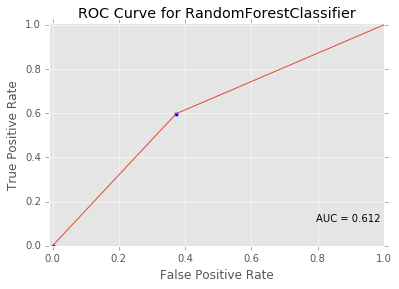

all   score: 0.611  baseline: 0.848   prec: 0.774   f1: 0.725  | test score 0.602  prec 0.782 f1 0.531  GP 8MM
2011  score: 0.787  baseline: 0.896   prec: 0.795   f1: 0.875  | test score 0.772  prec 0.804
2012  score: 0.644  baseline: 0.866   prec: 0.803   f1: 0.763  | test score 0.643  prec 0.808
2013  score: 0.539  baseline: 0.822   prec: 0.757   f1: 0.638  | test score 0.528  prec 0.767


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
eval_model_by_year(lambda: RFC(class_weight = 'balanced'), x = y_predict_train, x_test = y_predict_test)

# Regression modeling for payback ratio

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

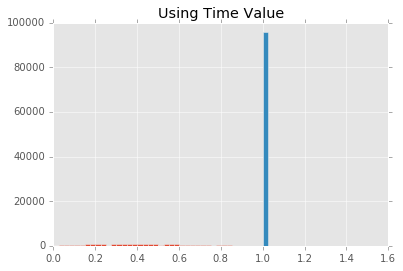

In [80]:
returns = data_filtered[['loan_status', 'loan_amount', 'installment',
                         'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 
                     ]]
returns['expected_payment'] = returns.installment * 36
returns['total_paid'] = returns.total_rec_int + returns.total_rec_late_fee + returns.total_rec_prncp
returns['ratio'] = np.where(returns.loan_status,
                            1.0,
                            returns['total_paid'] / returns['expected_payment'])
# Plot distribution
returns.groupby(returns.loan_status).ratio.hist(bins=40)
plt.title("Using Time Value")
plt.show()

In [81]:
returns_train = returns.ratio[sample_flags]
returns_test = returns.ratio[~sample_flags]

In [82]:
linear_returns_model = RidgeCV().fit(x_expanded, returns_train)
print linear_returns_model.score(x_test_expanded, returns_test)

0.0364670444717


In [83]:
linear_returns_model = RidgeCV().fit(cross_terms(x_expanded, 3), returns_train)
print linear_returns_model.score(cross_terms(x_test_expanded, 3), returns_test)

-0.0221812672779


In [84]:
from sklearn.linear_model import LassoCV
np.random.seed(1729)
linear_returns_model = LassoCV().fit(cross_terms(x_expanded, 3), returns_train)
print linear_returns_model.score(cross_terms(x_test_expanded, 3), returns_test)

0.0140974247708


In [85]:
linear_returns_model = Lin_Reg().fit(x_expanded, returns_train)
print linear_returns_model.score(x_test_expanded, returns_test)

0.00618591852152


In [86]:
for p in range(2,10):
    linear_returns_model = RidgeCV().fit(cross_terms(x_expanded, p), returns_train)
    print p, linear_returns_model.score(cross_terms(x_test_expanded, p), returns_test)

2 -0.00103544480118
3 -0.0221812672779
4 -0.201209794153
5 -87324949539.2
6 -6.43240608427e+14
7 -3.18467653869e+23
8 -8.49568911629e+31
9 -8.51238397703e+39


## Just for comparison, how does loan_subgrade do?

In [90]:
x_with_subgrade = x_expanded.copy()
x_with_subgrade['subgrade'] = data_filtered.loan_subgrade[x_with_subgrade.index]
x_with_subgrade_test = x_test_expanded.copy()
x_with_subgrade_test['subgrade'] = data_filtered.loan_subgrade[x_with_subgrade_test.index]

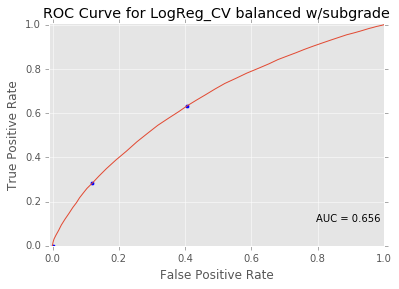

all   score: 0.628  baseline: 0.848   prec: 0.769   f1: 0.742  | test score 0.628  prec 0.775 f1 0.497  GP -55MM
C= 0.0001


In [93]:
# Compare log reg cv balanced with subgrade as an available predictor
logregcv_model_with_subgrade = eval_model_all_years(lambda: Log_Reg_CV(class_weight='balanced'), 
                                                    model_name='LogReg_CV balanced w/subgrade',
                                                    x = x_with_subgrade,
                                                    x_test = x_with_subgrade_test
                                                 )

# We want to know what value of C was selected by the cross-validation
print "C=", logregcv_model_with_subgrade.C_[0]

In [92]:
# And we want to know which predictors are important; we do this by sorting them
# by the absolute value of their coefficients
lr_coeff = pd.DataFrame(logregcv_model_with_subgrade.coef_.T, index=x_with_subgrade.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()
lr_coeff.sort_values('abs', ascending=False).coeff

subgrade                                    -0.074961
annual_income                                0.072283
dti                                         -0.068597
cpi                                         -0.048234
rir                                         -0.044138
gdp                                         -0.043424
total_accounts                               0.034438
inquiry_6_mos                               -0.028045
revol_util                                  -0.027936
home_owner__MORTGAGE                         0.024565
emp_cleaned__                               -0.022152
home_owner__RENT                            -0.022108
unemploy                                     0.018242
open_accounts                               -0.015952
months_since_earliest_credit                 0.015485
employ_length__n/a                          -0.014765
loan_purpose__credit_card                    0.014124
employ_length__10                            0.013009
desc_len                    